<a href="https://colab.research.google.com/github/zhangyingchengqi/Modern-Computer-Vision-with-PyTorch/blob/master/Chapter01/Chain_rule.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 方案一 基于损失值变化更新权重

In [1]:

from copy import deepcopy
import numpy as np
def line():
    print('='*80)
#前向传播
def feed_forward(inputs, outputs, weights):
    pre_hidden = np.dot(inputs,weights[0])+ weights[1]
    hidden = 1/(1+np.exp(-pre_hidden))
    out = np.dot(hidden, weights[2]) + weights[3]
    mean_squared_error = np.mean(np.square(out - outputs))
    return mean_squared_error

In [2]:
def update_weights(inputs, outputs, weights, lr):
    original_weights = deepcopy(weights)
    temp_weights = deepcopy(weights)
    updated_weights = deepcopy(weights)
    original_loss = feed_forward(inputs, outputs, original_weights)
    for i, layer in enumerate(original_weights):
        for index, weight in np.ndenumerate(layer):
            temp_weights = deepcopy(weights)
            temp_weights[i][index] += 0.0001
            _loss_plus = feed_forward(inputs, outputs, temp_weights)
            grad = (_loss_plus - original_loss)/(0.0001)
            updated_weights[i][index] -= grad*lr
    return updated_weights

In [3]:
x = np.array([[1,1]]); y = np.array([[0]])
W = [
    np.array([[-0.0053, 0.3793],
              [-0.5820, -0.5204],
              [-0.2723, 0.1896]], dtype=np.float32).T,
    np.array([-0.0140, 0.5607, -0.0628], dtype=np.float32),
    np.array([[ 0.1528, -0.1745, -0.1135]], dtype=np.float32).T,
    np.array([-0.5516], dtype=np.float32)
]
line()
print('Loss:'.upper())
print(feed_forward(x,y,W))
line()
print('Weights:'.upper())
[print(w) for w in W]
line()
print('Updated Weights:'.upper())
for epx in range(1):
    updated_weights = update_weights(x,y,W,1)
[print(w) for w in updated_weights];

LOSS:
0.33455008989960927
WEIGHTS:
[[-0.0053 -0.582  -0.2723]
 [ 0.3793 -0.5204  0.1896]]
[-0.014   0.5607 -0.0628]
[[ 0.1528]
 [-0.1745]
 [-0.1135]]
[-0.5516]
UPDATED WEIGHTS:
[[ 0.03748801 -0.62894595 -0.30494714]
 [ 0.42208242 -0.5673459   0.156948  ]]
[ 0.02878801  0.51375407 -0.09545201]
[[0.8341824 ]
 [0.25095794]
 [0.4228859 ]]
[0.60529804]


### Chain Rule 方案二:  使用链式法则实现反向传播 以更新权重
Calculate the updated weight value using Chain rule

In [4]:
# 1. 前向传播阶段（预测值）
pre_hidden = np.dot(x,W[0])+ W[1]
hidden = 1/(1+np.exp(-pre_hidden))
predicted_value = np.dot(hidden, W[2]) + W[3]

给定的网络结构为:
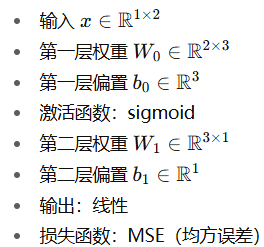

对各参数求导后，沿负梯度方向更新参数


In [5]:
# ⬇️ 第一层权重 W[0][0][0]，即 w11: 输入 x1 → 隐藏层第一个神经元 h1 的权重
# 梯度：∂C/∂w11 = ∂C/∂ŷ · ∂ŷ/∂h1 · ∂h1/∂z1 · ∂z1/∂w11
tmp = W[0][0][0] - (-2*(0-(predicted_value[0][0]))*(W[2][0][0])*hidden[0,0]*(1-hidden[0,0])*x[0][0])
print(tmp, updated_weights[0][0][0])

0.03748860333147175 0.037488014


In [ ]:
tmp = W[0][0][1] - (-2*(0-(predicted_value[0][0]))*(W[2][1][0])*hidden[0,1]*(1-hidden[0,1])*x[0][0])
print(tmp, updated_weights[0][0][1])

-0.6289373468565382 -0.62894595


In [ ]:
tmp = W[0][0][2] - (-2*(0-(predicted_value[0][0]))*(W[2][2][0])*hidden[0,2]*(1-hidden[0,2])*x[0][0])
print(tmp, updated_weights[0][0][0])

-0.304951263947996 0.037488014


In [ ]:
tmp = W[0][1][0] - (-2*(0-(predicted_value[0][0]))*(W[2][0][0])*hidden[0,0]*(1-hidden[0,0])*x[0][1])
print(tmp, updated_weights[0][1][0])

0.42208860145914084 0.42208242


In [ ]:
tmp = W[0][1][1] - (-2*(0-(predicted_value[0][0]))*(W[2][1][0])*hidden[0,1]*(1-hidden[0,1])*x[0][1])
print(tmp, updated_weights[0][1][1])

-0.5673373173880019 -0.5673459


In [ ]:
tmp = W[0][1][2] - (-2*(0-(predicted_value[0][0]))*(W[2][2][0])*hidden[0,2]*(1-hidden[0,2])*x[0][1])
print(tmp, updated_weights[0][1][2])

0.15694874675699821 0.156948


### 第一层偏置（b0）：对 h1/h2/h3 的偏置

In [ ]:
#  b1（第一个隐藏神经元的偏置）
tmp = W[1][0] - (-2*(0-(predicted_value[0][0]))*hidden[0,0]*(1-hidden[0,0])*W[2][0][0])
print(tmp, updated_weights[1][0])

0.028788602743620932 0.028788012


In [ ]:
tmp = W[1][1] - (-2*(0-(predicted_value[0][0]))*hidden[0,1]*(1-hidden[0,1])*W[2][1][0])
print(tmp, updated_weights[1][1])

0.5137626696420274 0.51375407


In [ ]:
tmp = W[1][2] - (-2*(0-(predicted_value[0][0]))*hidden[0,2]*(1-hidden[0,2])*W[2][2][0])
print(tmp, updated_weights[1][2])

-0.0954512566166247 -0.09545201


### 第二层权重（W1）：从隐藏层 → 输出层

In [ ]:
# h1 → ŷ 的权重
tmp = W[2][0][0]-(-2*(0-(predicted_value[0][0]))*hidden[0][0])
print(tmp, updated_weights[2][0][0])

0.8342055621416937 0.8341824


In [ ]:
tmp = W[2][1][0]-(-2*(0-(predicted_value[0][0]))*hidden[0][1])
print(tmp, updated_weights[2][1][0])

0.2509642654210383 0.25095794


In [ ]:
tmp = W[2][2][0]-(-2*(0-(predicted_value[0][0]))*hidden[0][2])
print(tmp, updated_weights[2][2][0])

0.422898309408289 0.4228859


### 第二层偏置（b1）：输出层偏置

In [ ]:
tmp = W[3][0]-(-2*(0-(predicted_value[0][0])))
print(tmp, updated_weights[3][0])

0.6052061234525776 0.60529804


总结图解链条（以 w11 为例）

$\frac{\partial \mathcal{L}}{\partial w_{11}} =
\underbrace{\frac{\partial \mathcal{L}}{\partial \hat{y}}}_{\text{输出误差}}
\cdot
\underbrace{\frac{\partial \hat{y}}{\partial h_1}}_{\text{输出层权重}}
\cdot
\underbrace{\frac{\partial h_1}{\partial z_1}}_{\text{sigmoid 导数}}
\cdot
\underbrace{\frac{\partial z_1}{\partial w_{11}}}_{x_1}$

每条链都遵循这个路径：损失→输出→激活→权重